In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras import models, layers


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/seattle-weather.csv")
print(df.head())


         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
df["temperature"] = (df["temp_max"] + df["temp_min"]) / 2


In [ ]:
X = df.drop(["temperature", "date", "weather"], axis=1)
y = df["temperature"]


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1)
])


In [ ]:
model.compile(
    optimizer="adam",
    loss="mse"
)


In [ ]:
epochs = 100

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 188.4163 - val_loss: 182.1516
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 182.4656 - val_loss: 180.2666
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 189.9642 - val_loss: 178.3840
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.6702 - val_loss: 176.5455
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 177.3572 - val_loss: 174.7106
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 172.8540 - val_loss: 172.8980
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180.8661 - val_loss: 171.0775
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164.5961 - val_loss: 169.3157
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.3733 - val_loss: 167.5283
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.4771 - val_loss: 165.7665
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 168.9307 - val_loss: 164.0053
Epoch 12/100
30/30

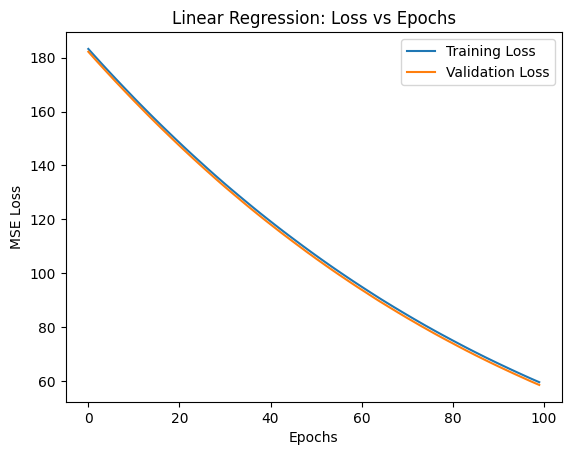

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Linear Regression: Loss vs Epochs")
plt.legend()
plt.show()


In [ ]:
min_val_loss = min(history.history["val_loss"])
best_epoch = history.history["val_loss"].index(min_val_loss) + 1

print("Best Epoch:", best_epoch)
print("Minimum Validation Loss:", min_val_loss)


Best Epoch: 100
Minimum Validation Loss: 58.689125061035156


In [ ]:
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("\n----- PERFORMANCE METRICS -----")
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE:", RMSE)
print("R² Score:", R2)
print("Prediction Accuracy (%):", R2 * 100)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

----- PERFORMANCE METRICS -----
MAE : 6.308191651777196
MSE : 61.130962600602565
RMSE: 7.818629202142954
R² Score: -0.6170580516322348
Prediction Accuracy (%): -61.70580516322348


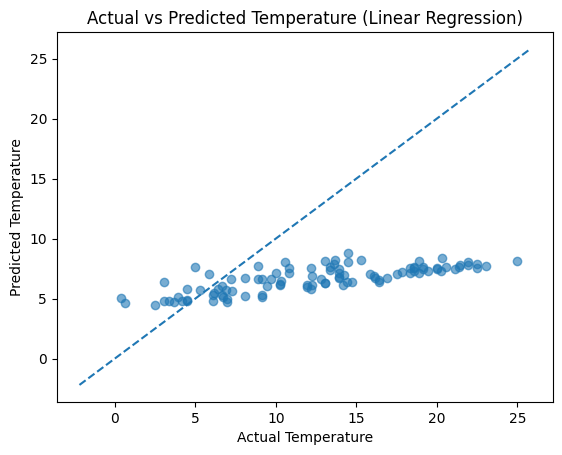

In [ ]:
plt.scatter(y_test[:100], y_pred[:100], alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature (Linear Regression)")
plt.show()
